$$\text{Applied Machine Learning in Python}$$
$$\text{week 6}$$

* Basis function Regression
* Model selection
    * The bias-variance trade-off
    * Validation and learning curves
    * Under-/overfitting
    * Grid Search
* Regularisation
    * L1 (LASSO)
    * L2 (Ridge)
* Support Vector Machine (SVM)


$$\textbf{Basis function regression}$$

We can account for non-linear dependencies in data by transforming the linear features with basis functions

For example: using the basis $\{1,x_1, x_2\}$ one can build a linear regression: $y=w_0 + w_1 x_1+ w_2 x_2$

Using the polynomial basis: $\{1, x_1, x_1^2, x_2, x_1x_2, x_2^2\}$, one can build a polynomial regression: $y=w_0 + w_1 x_1+ w_2 x_1^2 + w_3 x_1x_2 + w_4 x_2 + w_5 x_2^2$

Thus, by using various basis functions, we can capture nonlinearities in data.

In scikit-learn, the way to transform the linear features into polynomials is through the **'PolynomialFeatures()'**

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [255]:
from sklearn.preprocessing import PolynomialFeatures
# create a toy example
x = np.array([2.,3.,4.]).reshape((-1,1))
print x
poly_feat = PolynomialFeatures(degree=4, include_bias=True)
poly_feat.fit_transform(x)

[[ 2.]
 [ 3.]
 [ 4.]]


array([[   1.,    2.,    4.,    8.,   16.],
       [   1.,    3.,    9.,   27.,   81.],
       [   1.,    4.,   16.,   64.,  256.]])

$\{x_1, x_2, x_3\} \rightarrow \{x_1, x_2, x_3, x_1^2, x_2^2, x_3^2, x_1^3, x_2^3, x_3^3, x_1^4, x_2^4, x_3^4, ..., x_1^n, x_2^n, x_3^n\}$, where _'degree'_ = _n_

In [256]:
# polynomial regression up to order 7
poly_regression = Pipeline([("polynomial_features", PolynomialFeatures(degree=4)),("linear_regression", LinearRegression())])


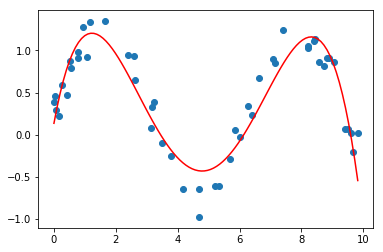

In [257]:
x = 10 * np.random.random(size=(50,1))
y = np.sin(x) + 0.5 * np.random.random(size=(50,1))
poly_regression.fit(x, y)
x_new = np.linspace(min(x), max(x), 100).reshape((-1,1))
y_hat = poly_regression.predict(x_new)
plt.scatter(x, y)
plt.plot(x_new, y_hat, 'r-')
plt.show()

$$\textbf{Model selection}$$

Every estimator has its advantages and drawbacks. Its generalization error can be decomposed in terms of **bias**, **variance** and **noise**. The **bias** of an estimator is its average error for different training sets. The **variance** of an estimator indicates how sensitive it is to varying training sets. **Noise** is a property of the data.

In statistics and machine learning, the **bias–variance tradeoff** is the problem of simultaneously minimising two sources of error that prevent supervised learning algorithms from generalising beyond their training set

* The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
* The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). 

<img src="plots/bv_plot_0.png"  align="center" style="width: 500px;"/>

The **bias** of an estimator is its average error for different training sets. The **variance** of an estimator indicates how sensitive it is to varying training sets. Noise is a property of the data.

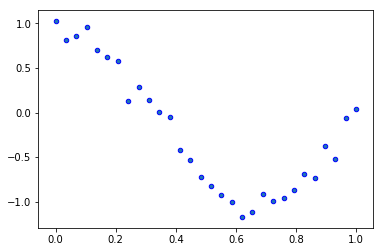

In [259]:
# ground truth function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# plot 
X = np.linspace(0,1,30)
y = true_fun(X) + np.random.randn(len(X)) * 0.1
plt.scatter(X, y, edgecolor='b', s=20)
plt.show()

In [260]:
y

array([ 1.02551034,  0.81264362,  0.86276889,  0.95848702,  0.70214564,
        0.62629354,  0.5836086 ,  0.12614273,  0.28879125,  0.13947115,
        0.00264369, -0.04670442, -0.42176681, -0.53613934, -0.72598082,
       -0.82425053, -0.92908762, -1.00091044, -1.17270741, -1.11270426,
       -0.91455029, -0.99756833, -0.95679044, -0.87118519, -0.69461636,
       -0.73789062, -0.37734645, -0.52725014, -0.06000326,  0.04266746])

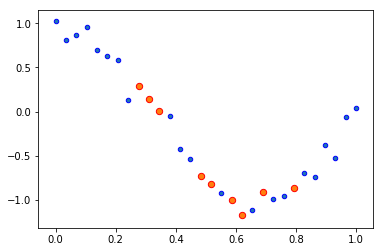

In [261]:
# Training / test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
plt.scatter(X_train, y_train, edgecolor='b', s=20)
plt.scatter(X_test, y_test, edgecolor='r', s=40)
plt.show()

In [262]:
# define linear regression model
linear_regression = LinearRegression()
# create polynomial features
polynomial_features = PolynomialFeatures(degree=1, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
pipeline.fit(X_train.reshape((-1,1)), y_train);

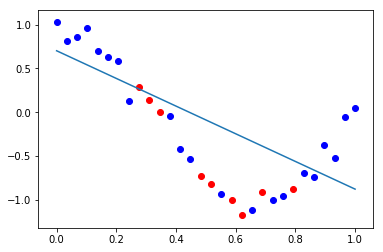

In [263]:
plt.plot(X, pipeline.predict(X.reshape((-1,1))))
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')
plt.show()

In [264]:
# print regression metrics - mean squared error
from sklearn.metrics import mean_squared_error
print 'train error: ' + str(mean_squared_error(y_true=y_train, y_pred=pipeline.predict(X_train.reshape((-1,1)))))
print 'test error: ' + str(mean_squared_error(y_true=y_test, y_pred=pipeline.predict(X_test.reshape((-1,1)))))


train error: 0.209229265442
test error: 0.306465219058


In [182]:
# fit polynomial of order 4
def fit_poly_n(n_poly = 4, plot_fig=True, verbose=True):
    polynomial_features = PolynomialFeatures(degree=n_poly, include_bias=False)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X_train.reshape((-1,1)), y_train);
    # plot results
    if plot_fig:
        plt.plot(X, pipeline.predict(X.reshape((-1,1))))
        plt.scatter(X_train, y_train, c='b')
        plt.scatter(X_test, y_test, c='r')
        plt.ylim((-2,2))
        plt.show()
    # compute the regression errors
    train_error = mean_squared_error(y_true=y_train, y_pred=pipeline.predict(X_train.reshape((-1,1))))
    test_error = mean_squared_error(y_true=y_test, y_pred=pipeline.predict(X_test.reshape((-1,1))))
    if verbose:
        print 'train error: ' + str(train_error)
        print 'test error: ' + str(test_error)
    return train_error, test_error



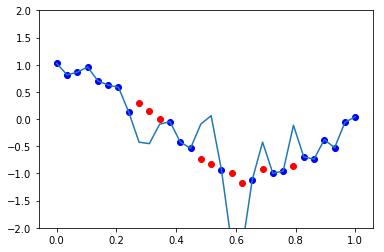

train error: 1.63429724634e-11
test error: 0.672653581772


(1.6342972463418317e-11, 0.67265358177230583)

In [269]:
fit_poly_n(n_poly=30)

In [184]:
def plot_bias_variance_tradeoff(n_samples = 30, degrees = [1, 4, 15], rand_seed=0):

    np.random.seed(rand_seed)
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    
    plt.figure(figsize=(20, 5))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error", cv=10)

        X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()))
    plt.show()

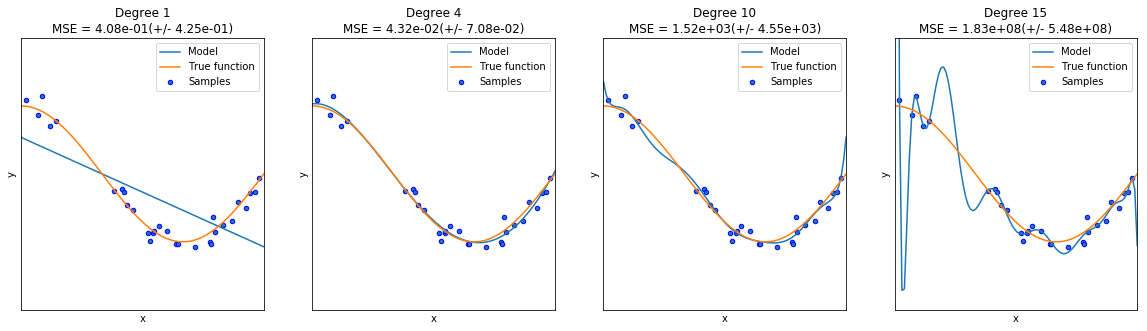

In [270]:
plot_bias_variance_tradeoff(n_samples = 30, degrees = [1, 4, 10, 15], rand_seed=0)

In [186]:
# training and validation (test) errors for various model complexity
poly_n = [1,2,4,6,8,10,12]#,16,20,25]
train_err = []
test_err = []

for poly_n_i in poly_n:
    tr_i, ts_i = fit_poly_n(n_poly=poly_n_i, plot_fig=False, verbose=False)
    train_err.append(tr_i)
    test_err.append(ts_i)

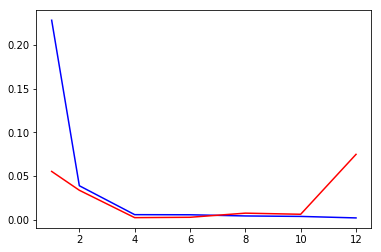

In [187]:
# plot validation curves
plt.plot(poly_n, train_err, 'b-')
plt.plot(poly_n, test_err, 'r-')
plt.show()

In [188]:
# Validation curve
def plot_validation_curve():
    x = np.linspace(0, 1, 1000)
    y1 = -(x - 0.5) ** 2
    y2 = y1 - 0.33 + np.exp(x - 1)

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
    ax.plot(x, y1, lw=10, alpha=0.5, color='red')

    ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
    ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

    ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
    ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
    ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.3, 0.5)

    ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
    ax.set_ylabel(r'model score $\longrightarrow$', size=14)

    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_title("Validation Curve Schematic", size=16)
    plt.show()

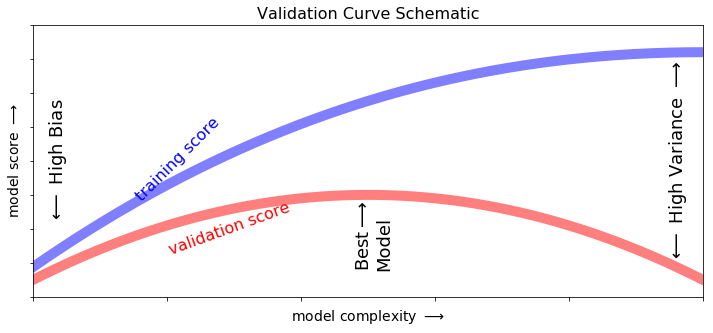

In [189]:
plot_validation_curve()

* The training score is higher than the validation score: the model will be a better fit to data it has seen than to data it has not seen.
* For very low model complexity (a high-bias model), the training data is **underfit**: the model is a poor predictor both for the training data and for any previously unseen data.
* For very high model complexity (a high-variance model), the training data is **overfit**: the model predicts the training data very well, but fails for any previously unseen data.
* For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

**Validation curves in scikit-learn**

In [190]:
# import validation curves
from sklearn.learning_curve import validation_curve
# polynomial regression
poly_reg = Pipeline([("polynomial_features", PolynomialFeatures()),("linear_regression", LinearRegression())])

In [191]:
# validation curves (training and validaiton errors)
param_range = [1,2,3,4,6,7]#,8]#,10]#,12]#,16]#,20,25]
train_scores, test_scores = validation_curve(estimator=poly_reg, X=X.reshape((-1,1)), y=y, 
                                             param_name="polynomial_features__degree", 
                                             param_range=param_range,
                                             scoring = 'neg_mean_squared_error',
                                             cv=5)

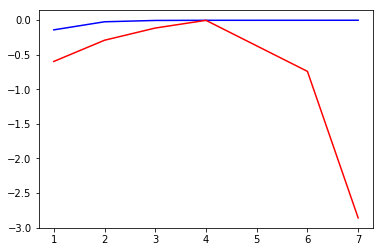

In [192]:
plt.plot(param_range, train_scores.mean(axis=1), 'b')
plt.plot(param_range, test_scores.mean(axis=1), 'r')
plt.show()

**Learning curve** - A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. 

In [193]:
# import learning curve
from sklearn.model_selection import learning_curve

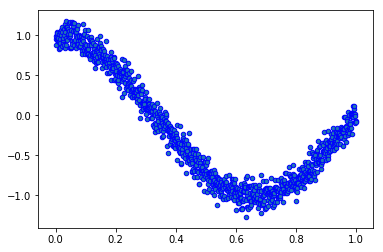

In [194]:
n_samples = 1000
X = np.linspace(0,1,n_samples)
y = true_fun(X) + np.random.randn(len(X)) * 0.1
plt.scatter(X, y, edgecolor='b', s=20)
plt.show()

In [195]:
param_range = [1,2,3,4,6,7,8,10,12,16,20,25]
train_scores, test_scores = validation_curve(estimator=poly_reg, X=X.reshape((-1,1)), y=y, 
                                             param_name="polynomial_features__degree", 
                                             param_range=param_range,
                                             scoring = 'neg_mean_squared_error',
                                             cv=5)

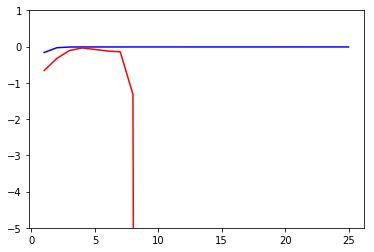

In [196]:
plt.plot(param_range, train_scores.mean(axis=1), 'b')
plt.plot(param_range, test_scores.mean(axis=1), 'r')
plt.ylim((-5,1))
plt.show()

<img src="plots/lc_0.png"  align="center" style="width: 400px;"/>

* A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
* A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
* A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together, but never cross.

**Automatic search for hyperparameters - GridSearch**

In [197]:
from sklearn.grid_search import GridSearchCV

In [271]:
# define data
X = np.linspace(0,1,100)
y = true_fun(X) + np.random.randn(len(X)) * 0.1
# define a pipeline with polynomial regression
poly_reg = Pipeline([('polynomial_features', PolynomialFeatures()),('linear_regression', LinearRegression())])
# define the parameters
param_grid = {'polynomial_features__degree': np.arange(21)}
# define the grid_search estimator
grid_search_estm = GridSearchCV(estimator=poly_reg, 
                                param_grid=param_grid, 
                                cv=5)

In [199]:
# fit the grid search estimator
grid_search_estm.fit(X.reshape((-1,1)), y);

In [200]:
# Estimator that was chosen by the search, i.e. estimator which gave the best score (highest score or smallest loss)
# on the left out data.
# print the best parameters (based on the optmised score)
print grid_search_estm.best_params_

{'polynomial_features__degree': 4}


In [201]:
# Mean cross-validated score of the best_estimator
print grid_search_estm.best_score_

0.373640297685


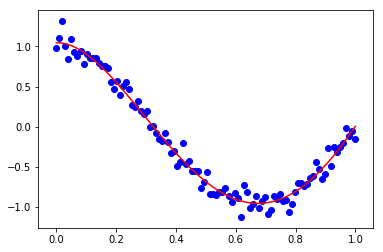

In [202]:
# plot data and the best model
plt.scatter(X, y, c='b')
plt.plot(X, grid_search_estm.best_estimator_.predict(X.reshape((-1,1))), 'r')
plt.show()

In [203]:
# k-neighbours classifier

In [204]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
iris_data = datasets.load_iris()
X, y = iris_data.data, iris_data.target
clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,30)}
grid_search = GridSearchCV(estimator=clf,
                                param_grid=param_grid,
                                cv=10, 
                                scoring='accuracy')

In [205]:
grid_search.fit(X, y);

In [206]:
# the best number of neighbours
print grid_search.best_params_

{'n_neighbors': 13}


In [207]:
# best score of optimal number of neighbours
print grid_search.best_score_

0.98


In [208]:
# predict classes
grid_search.best_estimator_.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

$$\textbf{Regularisation}$$

Models with high level of complexity can easily overfit the data (fit the noise), thus we need a mechanism to prevent flexible models from doing that. One possible solution is _regularisation_ or _penalisation_.

In [272]:
# compare the magnitude of coefficients of polynomial models
import pandas as pd
def generate_data(n_points):
    x = 10 * np.random.random(size=(n_points,1))
    y = np.sin(x) + 0.5 * np.random.random(size=(n_points,1))
    return x, y

In [273]:
def poly_reg_n(x, y, degree_n, plot_fig=False):
    poly_regression = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_n, include_bias=False)),
                                ("linear_regression", LinearRegression())])
    poly_regression.fit(x, y);
    if plot_fig:
        x_new = np.linspace(min(x), max(x), 100)
        plt.scatter(x, y, c='b')
        plt.plot(x_new, poly_regression.predict(x_new.reshape((-1,1))),'r-')
        plt.ylim((-5,5))
        plt.show()
    return [poly_regression.named_steps['linear_regression'].intercept_.ravel(), 
            poly_regression.named_steps['linear_regression'].coef_.ravel()]


In [274]:
x, y = generate_data(n_points=10)
ws = []
for deg_n in range(1,12):
    ws.append(pd.DataFrame(data=np.concatenate(poly_reg_n(x, y, deg_n))))

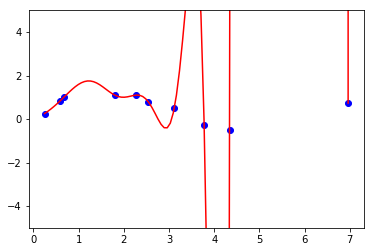

In [277]:
# x, y = generate_data(n_points=10)
poly_reg_n(x, y, 15, plot_fig=True);

In [213]:
df_ws = pd.concat(ws, axis=1)
df_ws.columns = range(1,12)
weight_names = ['w_'+str(i) for i in range(0,12)]
df_ws.index =  weight_names
df_ws

,1,2,3,4,5,6,7,8,9,10,11
w_0,0.643684,1.049944,1.689757,-0.063015,-0.935938,-0.822813,-1.881004,28.275156,1469.795778,192.858230,26.621558
w_1,-0.046583,-0.270566,-1.109862,2.510893,4.962133,4.594223,8.249800,-100.744048,-5554.553404,-508.503155,-48.921993
w_2,NaN,0.021456,0.221854,-1.358456,-2.975234,-2.662139,-6.222717,111.790660,6633.600267,43.290962,-34.836581
w_3,NaN,NaN,-0.012653,0.227868,0.636619,0.525126,2.073879,-58.076357,-3886.197278,477.178703,26.686859
w_4,NaN,NaN,NaN,-0.011808,-0.055820,-0.036645,-0.388211,16.552493,1311.609359,-406.297694,44.463875
w_5,NaN,NaN,NaN,NaN,0.001698,0.000119,0.043478,-2.753780,-273.015265,159.455605,-49.783526
w_6,NaN,NaN,NaN,NaN,NaN,0.000050,-0.002705,0.267272,35.698736,-35.976450,21.545426
w_7,NaN,NaN,NaN,NaN,NaN,NaN,0.000071,-0.014041,-2.860718,4.942694,-5.122068
w_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000309,0.128499,-0.409395,0.727041
w_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002479,0.018825,-0.061570


**Regularisation** - keeping the magnitude of coefficients under control (< _Const_)

* **Ordinary Least Squares:** $w = argmin_{w}\frac{1}{n}\sum_{i=1}^n(y_i −  w x_i)^2 =  argmin_w MSE(w)$

* **Ridge Regression (L2):** $w = argmin_w MSE(w) + \mu\sum_j^p w_j^2 = argmin_w MSE(w) + \mu||w_j||_2^2$

* **LASSO Regression (L1):** $w = argmin_w MSE(w) + \lambda\sum_j^p |w_j| = argmin_w MSE(w) + \lambda||w_j||_1$
* **Elastic-net Regression (L1+L2):** $w = argmin_w MSE(w) + \lambda\sum_j^p |w_j| + \mu\sum_j^p w_j^2 = argmin_w MSE(w) + \lambda||w_j||_1 + \mu||w_j||_2^2$

The values of penalty coefficients ($\mu, \lambda$) are determined through cross-validation process to minimise the loss function ('best score on unseen data')

In [278]:
# LASSO regularisation
degree_n = 2
x, y = generate_data(n_points=10)
# import LASSO linear model
from sklearn.linear_model import Lasso

def poly_reg_n_lasso(x, y, degree_n, alpha_i=0.1, plot_fig=False):
    if alpha_i < 1e-10:
        poly_regression_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_n, include_bias=False)),
                                ("linear_regression_lasso", LinearRegression())])
    else:
        poly_regression_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree_n, include_bias=False)),
                                ("linear_regression_lasso", Ridge(alpha=alpha_i))])
    poly_regression_lasso.fit(x, y);
    if plot_fig:
        x_new = np.linspace(min(x), max(x), 100)
        plt.scatter(x, y, c='b')
        plt.plot(x_new, poly_regression_lasso.predict(x_new.reshape((-1,1))),'r-')
        plt.ylim((-5,5))
        plt.show()
    return [poly_regression_lasso.named_steps['linear_regression_lasso'].intercept_.ravel(), 
            poly_regression_lasso.named_steps['linear_regression_lasso'].coef_.ravel()]


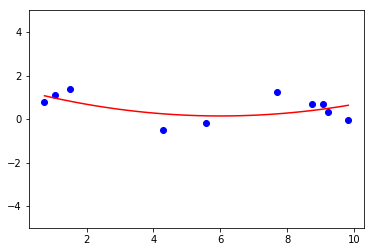

[array([ 1.35183589]), array([-0.40262476,  0.03354023])]

In [215]:
poly_reg_n_lasso(x, y, 2, alpha_i=0.000001, plot_fig=True)

In [279]:
x, y = generate_data(n_points=10)
ws = []
alpha_i = 10.0
for deg_n in range(1,12):
    ws.append(pd.DataFrame(data=np.concatenate(poly_reg_n_lasso(x, y, deg_n, alpha_i=alpha_i))))

/home/kormilitzin/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.51805826325e-17 / 1.11022302463e-16
  RuntimeWarning)
/home/kormilitzin/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.29328424957e-18 / 1.11022302463e-16
  RuntimeWarning)
/home/kormilitzin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [280]:
df_ws = pd.concat(ws, axis=1)
df_ws.columns = range(1,12)
weight_names = ['w_'+str(i) for i in range(0,12)]
df_ws.index =  weight_names
df_ws

,1,2,3,4,5,6,7,8,9,10,11
w_0,0.464972,0.810536,1.274843,1.582408,1.606486,1.526582,1.486938,1.454503,1.436713,1.411754,1.297962
w_1,-0.043202,-0.312650,-0.095930,-0.105964,-0.009111,-0.013034,-0.001538,-0.003068,-0.000673,-0.001555,-0.000013
w_2,NaN,0.034201,-0.125977,-0.294532,-0.045617,-0.043006,-0.007990,-0.009745,-0.002431,-0.003866,-0.000054
w_3,NaN,NaN,0.016096,0.065380,-0.113242,-0.070604,-0.024560,-0.019647,-0.006701,-0.006149,-0.000172
w_4,NaN,NaN,NaN,-0.003532,0.030937,0.010669,-0.039801,-0.022143,-0.014136,-0.006730,-0.000470
w_5,NaN,NaN,NaN,NaN,-0.002006,0.001112,0.016403,0.003125,-0.015965,-0.005025,-0.001075
w_6,NaN,NaN,NaN,NaN,NaN,-0.000156,-0.002023,0.001385,0.010416,-0.003427,-0.001851
w_7,NaN,NaN,NaN,NaN,NaN,NaN,0.000081,-0.000293,-0.002143,0.003274,-0.001590
w_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000015,0.000191,-0.000798,0.001380
w_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000006,0.000080,-0.000336


**Coefficient vector as a function of the regularization parameter**

In [218]:
# load some data
from sklearn.datasets import load_boston
# import cross validated estimator with LASSO
from sklearn.linear_model import LassoCV, Ridge, Lasso
boston = load_boston()
X, y = boston['data'], boston['target']

# number of parameters
def plot_coeffs(estm_i, X, y, pars):
    n_alphas = 200
    coefs = []
    for a in pars:
        estimator = estm_i(alpha=a, fit_intercept=False)
        estimator.fit(X, y)
        coefs.append(estimator.coef_)
    #ax = plt.figure(figsize=(12,6))
    ax = plt.gca()
    ax.plot(pars, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('parameter')
    plt.ylabel('weights')
    plt.title('Coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()
    return 0



In [219]:
pd.concat((pd.DataFrame(data=X, columns=boston.feature_names), pd.DataFrame(data=y, columns=['PRICE'])),axis=1).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


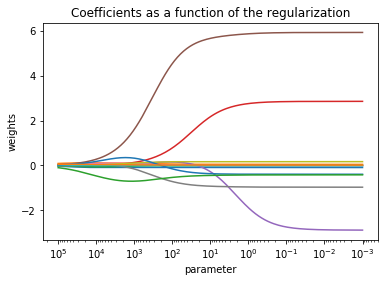

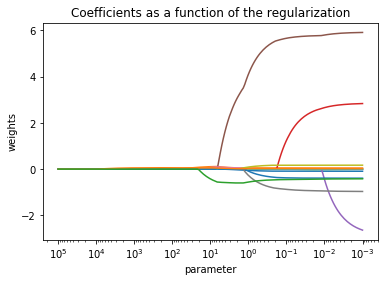

In [220]:
plot_coeffs(Ridge, X, y, np.logspace(-3, 5, 200));
plot_coeffs(Lasso, X, y, np.logspace(-3, 5, 200));

**Regularised classification**

In [221]:
# wine data set
wine_data = datasets.load_wine()
df_wine = pd.DataFrame(data=np.concatenate((wine_data.data, wine_data.target.reshape((-1,1))), axis=1), columns=wine_data.feature_names + ['wine_class'])
X_wine, y_wine = wine_data.data, wine_data.target

In [222]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [223]:
# Use logistic regression with Lasso CV
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
clf_logit = linear_model.LogisticRegression()
# define the grid of parameters
clf_params = {'C':np.logspace(-3,2,20), 'penalty':['l1', 'l2']}
grid_search_reg = GridSearchCV(estimator=clf_logit, param_grid=clf_params, cv=StratifiedKFold(n_splits=5))
y_pred_reg = cross_val_predict(grid_search_reg, X_wine, y_wine, cv=StratifiedKFold(n_splits=5))

In [224]:
print classification_report(y_true=y_wine, y_pred=y_pred_reg)

             precision    recall  f1-score   support

          0       0.97      0.95      0.96        59
          1       0.96      0.94      0.95        71
          2       0.96      1.00      0.98        48

avg / total       0.96      0.96      0.96       178



In [225]:
grid_search_reg.fit(X_wine, y_wine);

In [226]:
grid_search_reg.best_params_

{'C': 29.763514416313193, 'penalty': 'l1'}

In [227]:
pd.DataFrame(grid_search_reg.best_estimator_.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,2.619243,9.136017,-1.399434,-0.002242,0.000000,5.004061,0.0000,-2.786370,-0.504117,-0.367686,1.386067,0.035392
1,-0.321767,-2.192383,-10.434464,0.984127,-0.031560,0.533498,1.864221,6.5053,1.971750,-4.111077,14.157303,-2.151929,-0.027376
2,0.192311,1.978963,0.621373,0.052867,0.098381,0.000000,-9.473783,0.0000,-0.984404,1.686530,-6.033510,-6.960553,0.003410


In [228]:
linear_model.LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<img src="plots/log_details.png"  align="center" style="width: 1000px;"/>

<img src="plots/ccc.png"  align="center" style="width: 800px;"/>

$$\textbf{Support Vector Machine}$$

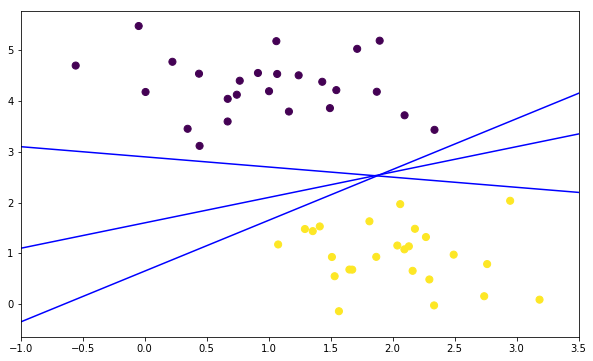

In [281]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-b')
plt.xlim(-1, 3.5);
plt.show()

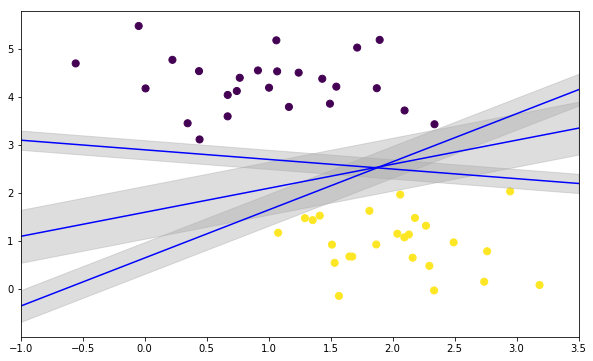

In [230]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-b')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',
alpha=0.4)
plt.xlim(-1, 3.5);
plt.show()

<img src="plots/svm_planes.png"  align="center" style="width: 500px;"/>

<img src="plots/svm_2.png"  align="center" style="width: 800px;"/>

In [231]:
# Importing Support Vector Classifier
from sklearn.svm import SVC 
clf_svc = SVC(kernel='linear', C=1E10)
clf_svc.fit(X, y);

In [232]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='b',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1], 
                   s=300, linewidth=2, 
                   facecolors='none', edgecolors='r');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #plt.show()    

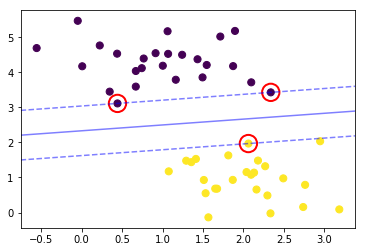

support vectors: 
[[ 0.44359863  3.11530945]
 [ 2.33812285  3.43116792]
 [ 2.06156753  1.96918596]]


In [233]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf_svc)
plt.show()

print 'support vectors: '
print clf_svc.support_vectors_

In [234]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    #plt.show()

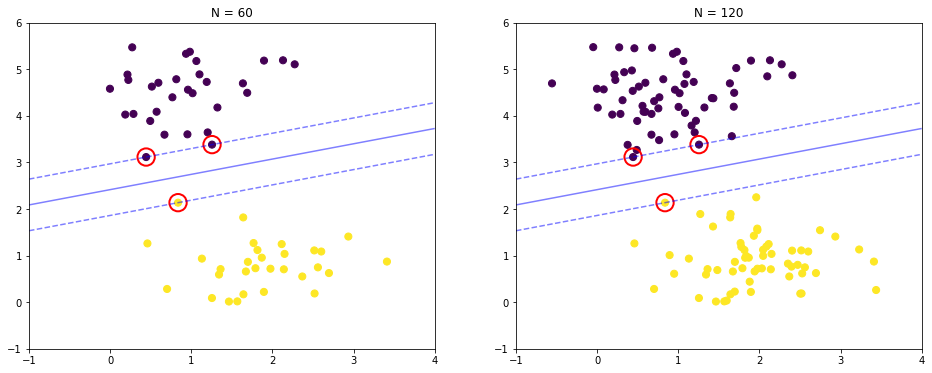

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
plt.show()

**Soft margin SVM**

If the training set is not linearly separable, the standard approach is to allow the fat decision margin to make a few mistakes (some points - outliers or noisy examples - are inside or on the wrong side of the margin). We then pay a cost for each misclassified example, which depends on how far it is from meeting the margin requirement.

<img src="plots/svm_3.png"  align="center" style="width: 3000px;"/>

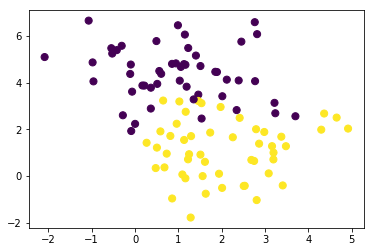

In [236]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plt.show()

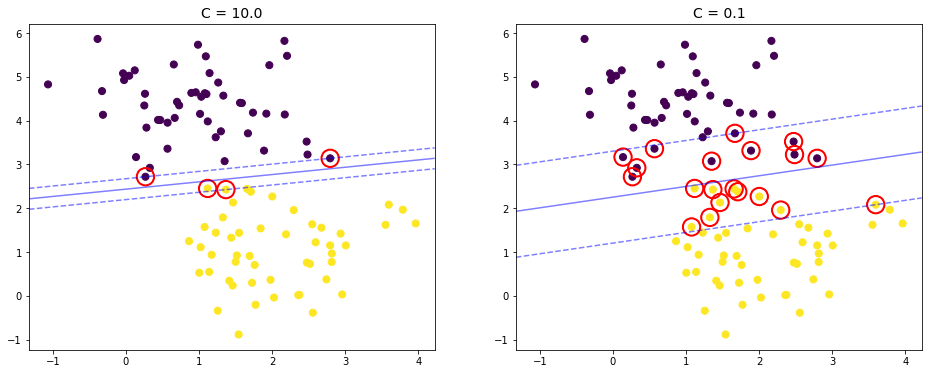

In [243]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], s=300, lw=1, facecolors='none', edgecolors='r');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
plt.show()

**How to find the best parameter 'C'?**

In [244]:
clf_svm = SVC()
param_svm = {'C':np.logspace(-5, 5, 50)}
grid_search_svm = GridSearchCV(estimator=clf_svm, 
                               param_grid=param_svm,
                              cv=StratifiedKFold(n_splits=10))

In [245]:
y_pred_svm = cross_val_predict(grid_search_svm, X, y, cv=StratifiedKFold(n_splits=10))

In [246]:
print classification_report(y_true=y, y_pred=y_pred_svm)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.98      1.00      0.99        50

avg / total       0.99      0.99      0.99       100



In [247]:
grid_search_svm.fit(X, y);

In [248]:
print grid_search_svm.best_params_

{'C': 0.1206792640639329}
